# Data vocacional test

## 1 - Initial configs

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
#broken by now
#from missforest import MissForest
#from fancyimpute import IterativeImputer

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## 2 - KDD Process

### 2.1. - Selection

#### 2.1.1. - Data loading

In [72]:
df = pd.read_excel('sods.xlsx')
df

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,26.0,Masculino,Branca,Não,True,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, Oracle, MariaDB, HBase, MySQL",Não sei opinar,Analista de Dados/Data Analyst
4267,30.0,Feminino,Branca,Não,True,Minas Gerais (MG),Mestrado,Outras Engenharias,de 1 a 2 anos,Python,"SQL SERVER, SAP HANA",Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...
4268,29.0,Masculino,Branca,Não,True,São Paulo (SP),Mestrado,Outras Engenharias,de 4 a 6 anos,NaN,NaN,NaN,NaN
4269,NaN,Masculino,Branca,Não,True,São Paulo (SP),Não tenho graduação formal,NaN,Menos de 1 ano,Python,"Microsoft Access, Oracle",Azure (Microsoft),Outra Opção


In [73]:
df.dtypes

idade                      float64
genero                      object
etnia                       object
pcd                         object
vive_no_brasil                bool
estado_moradia              object
nivel_ensino                object
formacao                    object
tempo_experiencia_dados     object
linguagens_preferidas       object
bancos_de_dados             object
cloud_preferida             object
cargo                       object
dtype: object

#### 2.1.2. - Selection

In [74]:
df.drop(['estado_moradia', 'vive_no_brasil'], axis=1, inplace=True)
df1 = df.drop(['etnia'], axis=1)
df2 = df.drop(['pcd'], axis=1)

### 2.2. - Preprocessing

#### 2.2.1. - Analysing missing data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    4197 non-null   float64
 1   genero                   4262 non-null   object 
 2   etnia                    4271 non-null   object 
 3   pcd                      4271 non-null   object 
 4   nivel_ensino             4271 non-null   object 
 5   formacao                 4149 non-null   object 
 6   tempo_experiencia_dados  3694 non-null   object 
 7   linguagens_preferidas    2979 non-null   object 
 8   bancos_de_dados          2978 non-null   object 
 9   cloud_preferida          2981 non-null   object 
 10  cargo                    2981 non-null   object 
dtypes: float64(1), object(10)
memory usage: 367.2+ KB


In [76]:
def plot_na(df):
    na_data = {
        "OK": [(~df[column].isna()).sum() for column in df.columns],
        "NA": [df[column].isna().sum() for column in df.columns]
    }

    df_na = pd.DataFrame(na_data, index=df.columns)

    df_na["OK%"] = df_na["OK"] / df.shape[0] * 100
    df_na["NA%"] = df_na["NA"] / df.shape[0] * 100

    df_na = df_na.sort_values(by="NA%", ascending=True)

    fig = plt.figure(figsize=(16, 9))
    plt.barh(df_na.index, df_na["NA%"])
    for i, v in enumerate(df_na["NA%"]):
        plt.text(v + 0.5, i, f"{round(v, 2)}%", va="center")
    plt.title("Quantidade de dados ausentes por coluna")
    plt.grid(axis='x')


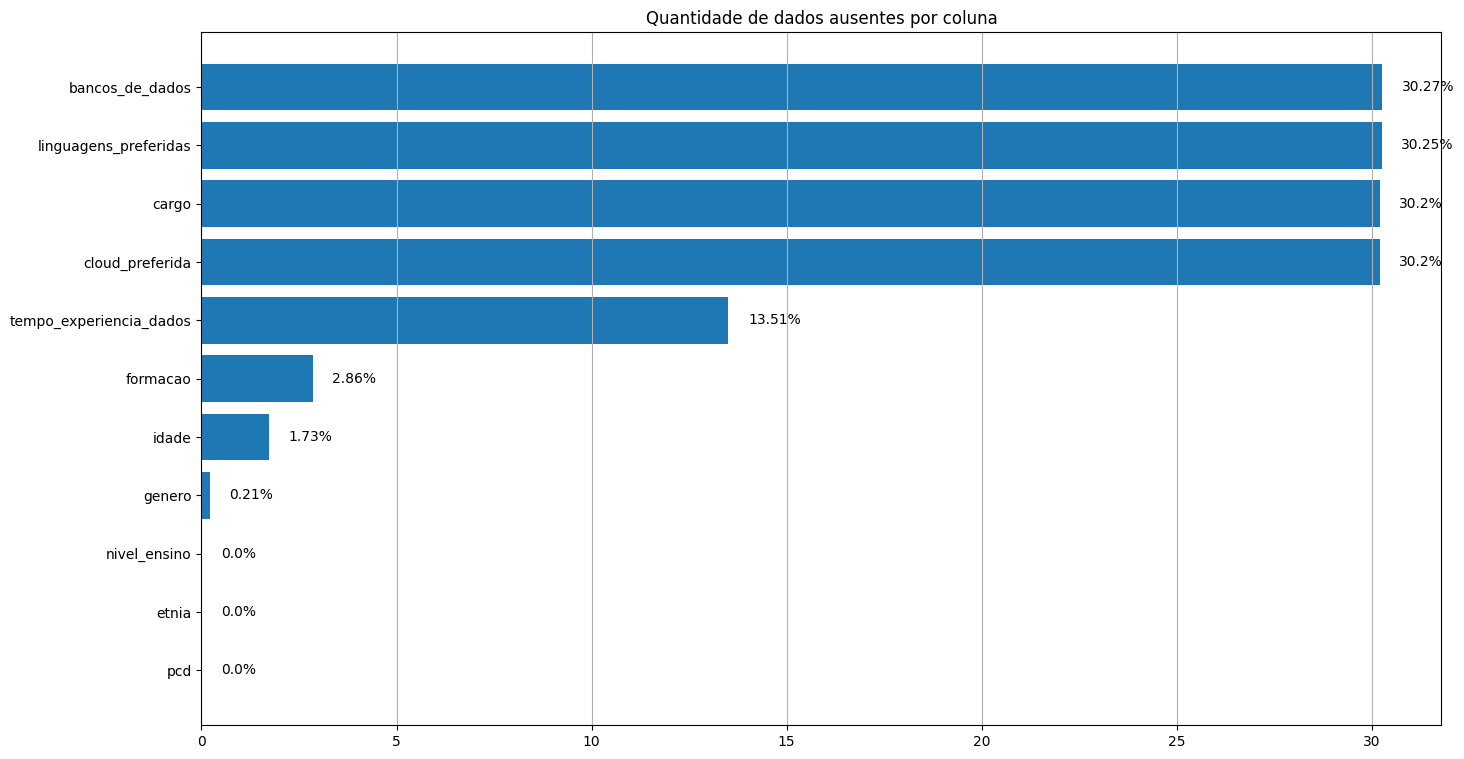

In [77]:
plot_na(df)

In [78]:
total_rows = df.shape[0]
null_rows = df.isna().any(axis=1).sum()
null_percentage = (null_rows / total_rows) * 100

print(f"Total de linhas: {total_rows}")
print(f"Número de linhas com valores nulos: {null_rows}")
print(f"Porcentagem de linhas com valores nulos: {null_percentage:.2f}%")


Total de linhas: 4271
Número de linhas com valores nulos: 1406
Porcentagem de linhas com valores nulos: 32.92%


In [79]:
def plot_missing_data(df):
    fig = plt.figure(figsize=(16, 9))
    plt.imshow(df.isna().T, aspect="auto", cmap="viridis")
    plt.xlabel("Colunas")
    plt.ylabel("Linhas")
    plt.title("Mapa de calor de dados ausentes")
    plt.grid(False)

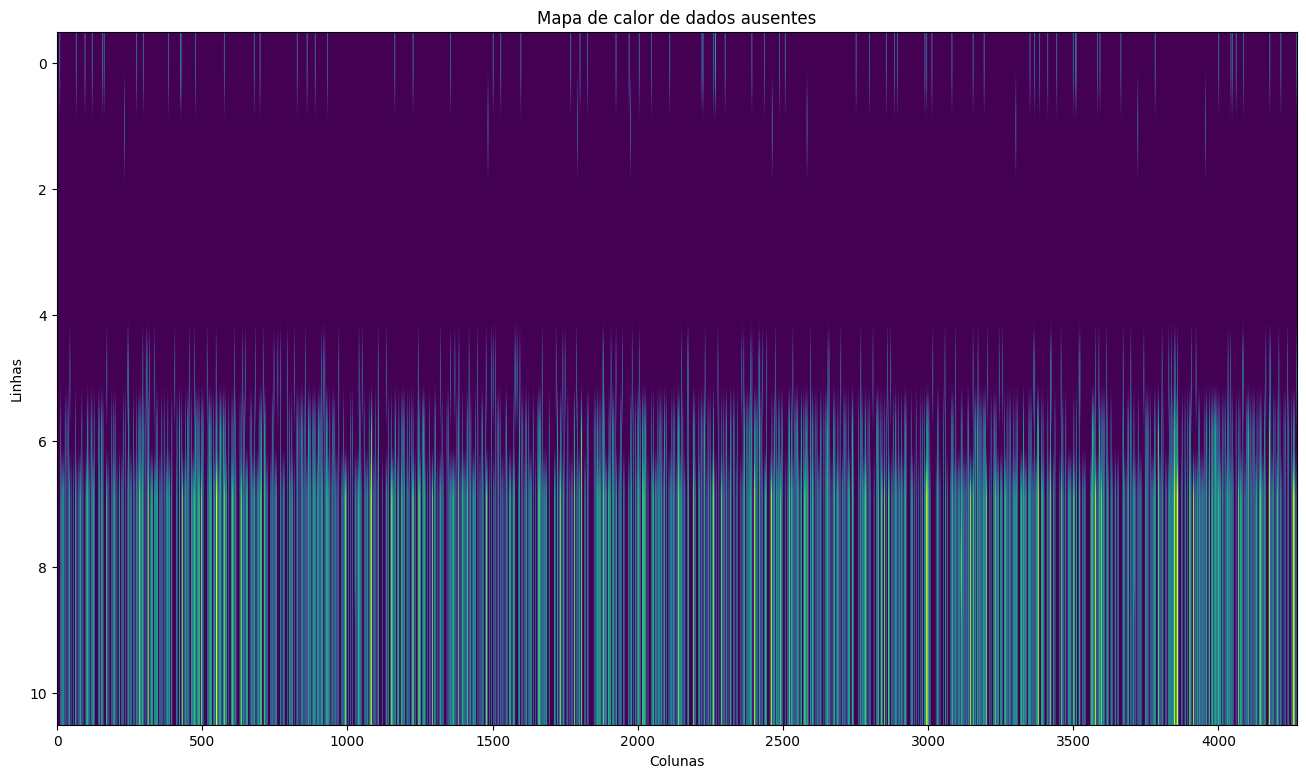

In [80]:
plot_missing_data(df)

#### 2.2.2 Substituting missing data with choosen strategy

In [81]:

strategy = 'knn'

def handle_missing_values(df, strategy):

    if strategy == 'knn':
        # Separar as colunas categóricas e numéricas
        categorical_columns = df.select_dtypes(include=['object']).columns
        numerical_columns = df.select_dtypes(exclude=['object']).columns

        # Codificar as colunas categóricas
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
        
        print("Imputação KNN")
        # Aplicar a imputação KNN
        imputer = KNNImputer(n_neighbors=5)
        df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

        # Decodificar as colunas categóricas de volta ao DataFrame imputado
        for col in categorical_columns:
            df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].round().astype(int))
        

    elif strategy == 'dropna':
        print("Removendo linhas com valores nulos")
        # Remover linhas com valores nulos
        df_imputed = df.dropna()

    
    return df_imputed


# Mostrar o DataFrame imputado
df_imputed = handle_missing_values(df, strategy)
df_imputed.head()


Imputação KNN


,idade,genero,etnia,pcd,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,nan,nan,nan,nan
2,53.0,Masculino,Branca,Não,Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...


In [82]:
total_rows = df_imputed.shape[0]
null_rows = df_imputed.isna().any(axis=1).sum()
null_percentage = (null_rows / total_rows) * 100

print(f"Total de linhas: {total_rows}")
print(f"Número de linhas com valores nulos: {null_rows}")
print(f"Porcentagem de linhas com valores nulos: {null_percentage:.2f}%")

Total de linhas: 4271
Número de linhas com valores nulos: 0
Porcentagem de linhas com valores nulos: 0.00%


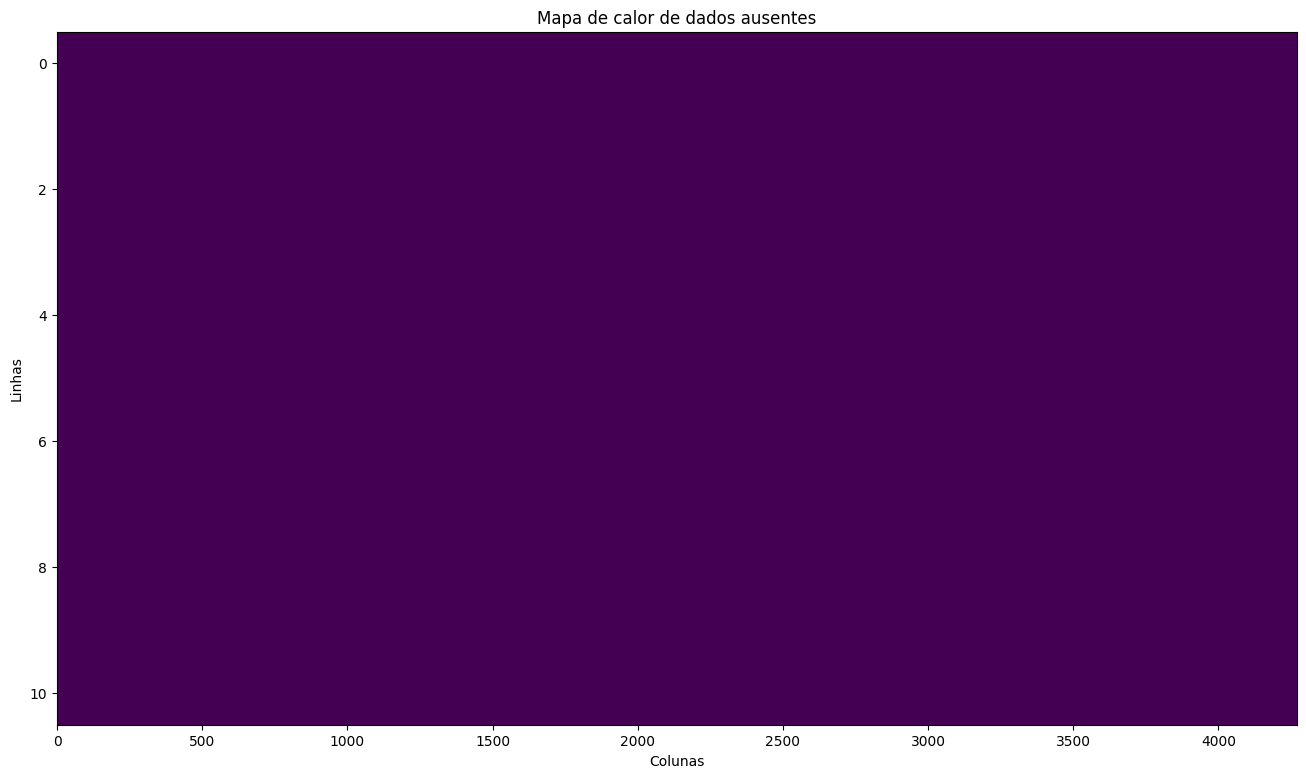

In [83]:
plot_missing_data(df_imputed)

### 2.3. - Transformation

In [84]:
df_transformed = df_pp.copy()
df_transformed

NameError: name 'df_pp' is not defined

/tmp/ipykernel_45985/2733494778.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


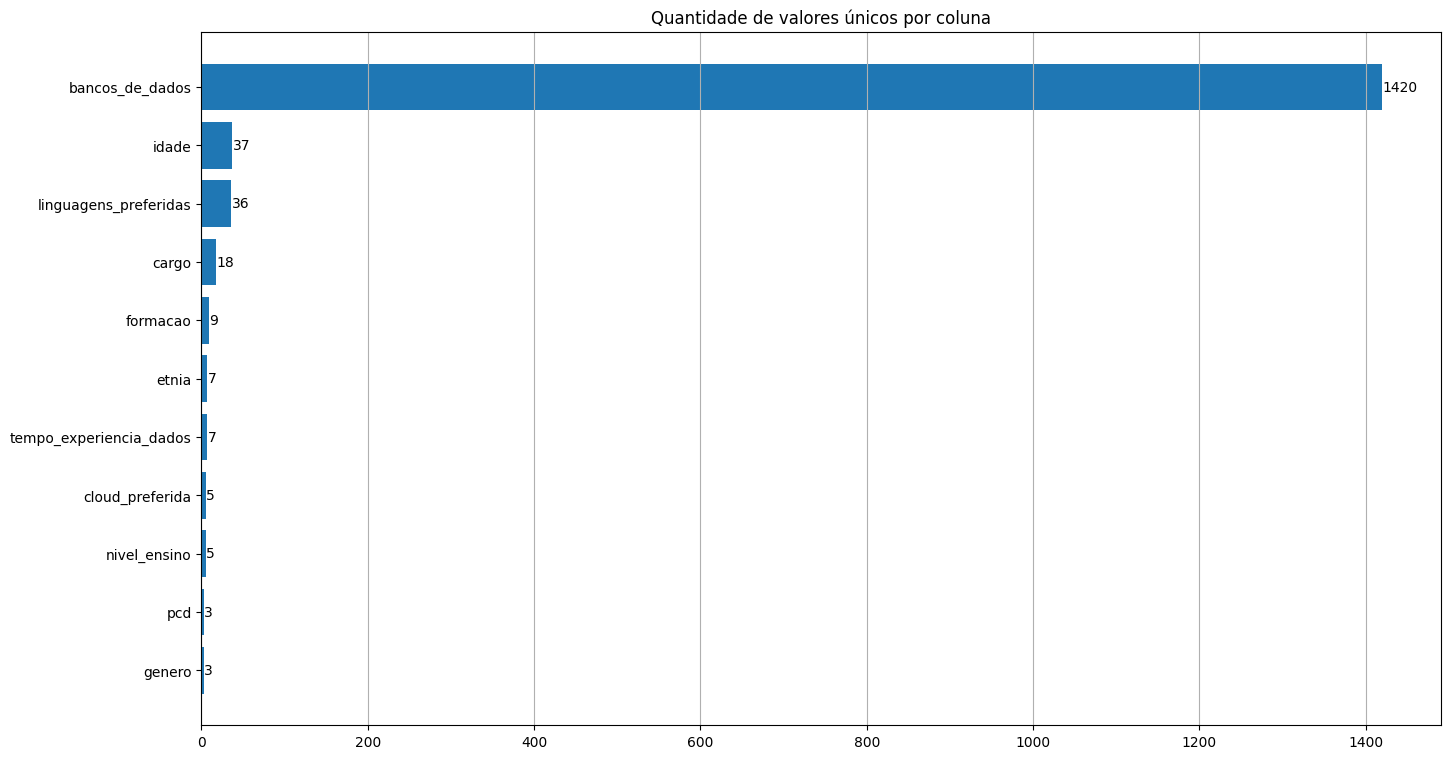

In [102]:
counts_data = {
    "count": [df_transformed[column].nunique() for column in df_transformed.columns],
    "type": [df_transformed[column].dtype for column in df_transformed.columns]
}

df_counts = pd.DataFrame(counts_data, index=df_transformed.columns)
df_counts = df_counts.sort_values(by="count", ascending=True)
df_counts["count"].sum()
fig = plt.figure(figsize=(16, 9))
plt.barh(df_counts.index, df_counts["count"])
for i, v in enumerate(df_counts["count"]):
    plt.text(v + 0.5, i, str(v), va="center")
plt.title("Quantidade de valores únicos por coluna")
plt.grid(axis='x')
fig.show()

#### 2.3.1. - Tratamento do atributo bancos_de_dados

In [103]:
# Função para dividir os valores em listas
# Função para classificar os valores
def classificar_banco(valor):
    if valor in [
        "Nao utilizo", 
        "Nao uso", 
        "Nao atuo na area de tech na empresa ainda",
        "NENHUM", 
        "Nenhuma", 
        "não uso nenhum", 
        "Não utilizo nenhum", 
        "Nenhuma das respostas", 
        "Nenhum dos listados, apenas Excel", 
        "NÃO RECONHEÇO NENHUM", 
        "Nenhum desses", 
        "Nenhum acima",
        "Nenhum dos citados acima", 
        "Nenhum destes",
        "nao utilizo",
        "nenhuma",
        "Nenhum",
        "Não sabe",
        "Não utilizo.",
        "Não atuo ainda nisso",
        "Não utiluzo",
        "Não temos BD",
        "Não atuo na área ainda, estou em transição de carreira",
        "Não uso",
        "Não trabalho com banco diretamente",
        "Não possuímos um banco de dados.",
        "não utilizamos banco de dados",
        "Não trabalho com base de dados.",
        "Não uso BD no trabalho, somente em cursos",
        "Não usamos",
        "Não sei",
        "Não se aplica",
        "Não tenho acesso ao banco de dados devido ao compliance da empresa",
        "Não utilizo bancos de dados.",
        "Não trabalho com dados",
        "Não utilizo",
        "Não atuo na área ainda",
        "Nda",
        "Nd",
        "NSA",
        "none"
        ]:
        return "nao"
    else:
        return valor
# Aplicar a função à coluna "bancos_de_dados"
df_transformed["bancos_de_dados"] = df_transformed["bancos_de_dados"].apply(classificar_banco)

df_transformed['bancos_de_dados'] = df_transformed['bancos_de_dados'].apply(lambda x: x.split(', ') if x != 'Nenhum' else [])

# Obter todos os tipos únicos de bancos de dados
all_databases = set(db for sublist in df_transformed['bancos_de_dados'] for db in sublist)

# Criar novas colunas para cada tipo de banco de dados
for db in all_databases:
    df_transformed[db] = df_transformed['bancos_de_dados'].apply(lambda x: db in x)

# Remover a coluna original
df_transformed.drop(['bancos_de_dados'], axis=1, inplace=True)
df_transformed

/tmp/ipykernel_45985/1156233330.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transformed[db] = df_transformed['bancos_de_dados'].apply(lambda x: db in x)
/tmp/ipykernel_45985/1156233330.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transformed[db] = df_transformed['bancos_de_dados'].apply(lambda x: db in x)
/tmp/ipykernel_45985/1156233330.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

,idade,genero,etnia,pcd,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,cloud_preferida,cargo,...,DATASUS,Autonomous DB,Bigtable,Microsoft Access,Excel,Fontes internas e de clientes,SPSS,Oracle,DuckDB,Banco de dados próprio da empresa
0,39.0,Masculino,Parda,Não,Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,Amazon Web Services (AWS),DBA/Administrador de Banco de Dados,...,False,False,False,False,False,False,False,True,False,False
2,53.0,Masculino,Branca,Não,Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...,...,False,False,False,False,False,False,False,True,False,False
3,27.0,Masculino,Branca,Não,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Não sei opinar,Cientista de Dados/Data Scientist,...,False,False,False,False,False,False,False,False,False,False
4,46.0,Feminino,Branca,Não,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...,...,False,False,False,True,False,False,False,False,False,False
5,32.0,Feminino,Parda,Não,Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Não tenho experiência na área de dados,Python,Google Cloud (GCP),Professor,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,26.0,Masculino,Parda,Não,Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,Python,Google Cloud (GCP),Engenheiro de Dados/Arquiteto de Dados/Data En...,...,False,False,False,False,False,False,False,False,False,False
4265,28.0,Masculino,Branca,Não,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Julia,Azure (Microsoft),Analista de Marketing,...,False,False,False,False,False,False,False,False,False,False
4266,26.0,Masculino,Branca,Não,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,Não sei opinar,Analista de Dados/Data Analyst,...,False,False,False,False,False,False,False,True,False,False
4267,30.0,Feminino,Branca,Não,Mestrado,Outras Engenharias,de 1 a 2 anos,Python,Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...,...,False,False,False,False,False,False,False,False,False,False


#### 2.3.2. - Tratamento do atributo "linguagens_preferidas"

In [104]:
def classificar_linguagem(valor):
    if valor in [
        "Nao atuo com programação", 
        "NÃO SEI", 
        "Não uso", 
        "Não utilizo", 
        "Nenhum", 
        "Nenhuma"
        ]:
        return "nao"
    else:
        return valor
# Aplicar a função à coluna "bancos_de_dados"
df_transformed["linguagens_preferidas"] = df_transformed["linguagens_preferidas"].apply(classificar_linguagem)

In [105]:
df_transformed["cargo"].value_counts()

cargo
Analista de Dados/Data Analyst                                         620
Cientista de Dados/Data Scientist                                      548
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    473
Analista de BI/BI Analyst                                              370
Outra Opção                                                            245
Analista de Negócios/Business Analyst                                  119
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            101
Engenheiro de Machine Learning/ML Engineer                              68
Analytics Engineer                                                      68
Analista de Suporte/Analista Técnico                                    63
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                      49
Analista de Inteligência de Mercado/Market Intelligence                 28
Outras Engenharias (não inclui dev)                                     27
Professor          

#### 2.3.2. - Vetorização de categorias

In [106]:
ohe_encoder = OneHotEncoder(sparse_output=False)

categorical_columns = vetor = [
    "idade",
    "genero",
    "etnia",
    "pcd",
    "nivel_ensino",
    "formacao",
    "tempo_experiencia_dados",
    "linguagens_preferidas",
    "cloud_preferida",
    "Google Firestore",
    "Denodo",
    "Google Big Query",
    "Vertica",
    "Oracle",
    "Google",
    "Diversas fontes de marketing digital",
    "Azure Synapse",
    "Impala",
    "Clickhouse",
    "PowerBI",
    "Solução proprietária",
    ".CSV",
    "Bases Excel e csv extraídas direto no site",
    "midias sociais",
    "SAS Libs",
    "nao",
    "CruxDB",
    "Outro",
    "Presto",
    "MicroStrategy",
    "Solr",
    "nosso banco é no excel",
    "HANA",
    "Azue Blob Storage",
    "Splunk",
    "Pesquisas empírica que eu coleto os dados",
    "DATASUS",
    "DynamoDB",
    "Progress",
    "nenhum",
    "Firebird",
    "Cloud Spanner",
    "Office",
    "Azure Blob Storage",
    "sistema de crm",
    "Cassandra",
    "Informix",
    "Espaider",
    "SharePoint",
    "Hadoop",
    "Dados geoespaciais",
    "Azure Data Lake",
    "RD STATION",
    "HPCC Systems",
    "Interno",
    "API",
    "HBase",
    "Redis",
    "SAS",
    "Consumo de APIS com azure functions",
    "Google Sheets",
    "Medidata Rave",
    "Elaticsearch",
    "interno",
    "Azure",
    "Deltalake",
    "EXCEL",
    "Azure blob storage",
    "Firebase",
    "Google Analytics",
    "Metabase",
    "Azure Data Explorer",
    "Fontes internas e de clientes",
    "Snowflake",
    "Bigtable",
    "Amazon Redshift",
    "ClickHouse",
    "Azure Data lake",
    "Azure Storage Account",
    "MS Azure",
    "DB2",
    "MongoDB",
    "S3",
    "Lista do Sharepoint",
    "Cosmos DB",
    "Synapse",
    "Superset",
    "Google sheets",
    "Kobotoolbox",
    "SAP ECC",
    "Datomic",
    "SAP",
    "IBM Informix",
    "SQLite",
    "DBeaver",
    "dados alternativos e dados internos da empresa",
    "HUE",
    "Knime",
    "Amazon Athena",
    "CoachDB",
    "excel",
    "Google BigQuery",
    "SQL SERVER",
    "Dados internos",
    "PWA Microsoft - MySQL ou SQL",
    "SAP HANA",
    "Azure ADLS",
    "MariaDB",
    "Cognos",
    "Autonomous DB",
    "InfluxDB",
    "Dados não estruturados",
    "Microsoft Access",
    "Sharepoint",
    "Hive",
    "SPSS",
    "SQL Dbx",
    "Excel",
    "B.O SAP",
    "Databricks SQL",
    "GCS",
    "PostgreSQL",
    "Amazon Aurora ou RDS",
    "sintax",
    "Dataflow",
    "Sybase",
    "Azure SQL",
    "Salesforce",
    "Fontes da empresa em html ou csv",
    "Base de dados local",
    "MSSQL",
    "ODBC",
    "MySQL",
    "Google Cloud Storage",
    "Databricks",
    "IBm blue mix",
    "Teradata",
    "Dados públicos externos",
    "Banco de dados próprio da empresa",
    "sas",
    "Base interna",
    "Access",
    "big table",
    "Dremio",
    "Dali - HPCC System",
    "DuckDB",
    "Neo4J"
]

encoded_data = ohe_encoder.fit_transform(df_transformed[categorical_columns])
new_columns = ohe_encoder.get_feature_names_out(categorical_columns)

df_ohe = pd.DataFrame(encoded_data, columns=new_columns)
df_not_phe = df_transformed.drop(columns=categorical_columns).reset_index(drop=True)

df_transformed = pd.concat([df_not_phe, df_ohe], axis=1)

df_transformed

,cargo,idade_18.0,idade_19.0,idade_20.0,idade_21.0,idade_22.0,idade_23.0,idade_24.0,idade_25.0,idade_26.0,...,big table_False,big table_True,Dremio_False,Dremio_True,Dali - HPCC System_False,Dali - HPCC System_True,DuckDB_False,DuckDB_True,Neo4J_False,Neo4J_True
0,DBA/Administrador de Banco de Dados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,Desenvolvedor/ Engenheiro de Software/ Analist...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Cientista de Dados/Data Scientist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Desenvolvedor/ Engenheiro de Software/ Analist...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,Professor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,Engenheiro de Dados/Arquiteto de Dados/Data En...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2861,Analista de Marketing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2862,Analista de Dados/Data Analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2863,Engenheiro de Dados/Arquiteto de Dados/Data En...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### 2.3.3. - Vetorização de classes

In [107]:
label_encoder = LabelEncoder()
encoded_Data = label_encoder.fit_transform(df_transformed["cargo"])
df_transformed = df_transformed.drop(columns=["cargo"])
df_transformed["cargo"] = encoded_Data
df_transformed

,idade_18.0,idade_19.0,idade_20.0,idade_21.0,idade_22.0,idade_23.0,idade_24.0,idade_25.0,idade_26.0,idade_27.0,...,big table_True,Dremio_False,Dremio_True,Dali - HPCC System_False,Dali - HPCC System_True,DuckDB_False,DuckDB_True,Neo4J_False,Neo4J_True,cargo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11
2861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3
2862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
2863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11


In [108]:
labels = label_encoder.classes_
labels

array(['Analista de BI/BI Analyst', 'Analista de Dados/Data Analyst',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Analista de Marketing', 'Analista de Negócios/Business Analyst',
       'Analista de Suporte/Analista Técnico', 'Analytics Engineer',
       'Cientista de Dados/Data Scientist',
       'DBA/Administrador de Banco de Dados',
       'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
       'Economista',
       'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
       'Engenheiro de Machine Learning/ML Engineer', 'Estatístico',
       'Outra Opção', 'Outras Engenharias (não inclui dev)',
       'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)', 'Professor'],
      dtype=object)

#### 2.3.4. - Dados de extração de conhecimento e dados de classes

In [109]:
X = df_transformed.iloc[:, :-1].to_numpy()
y = df_transformed.iloc[:, -1].to_numpy()

In [110]:
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [111]:
y

array([ 8,  9,  7, ...,  1, 11,  1])

### 2.4. - Data Mining

In [112]:
TEST_SIZE = 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=42
)

In [113]:
# shapes dos 4 subconjuntos resultantes

df_shapes = pd.DataFrame({
    "X": [X_train.shape, X_test.shape],
    "Y": [y_train.shape, y_test.shape]
})

df_shapes.index = ["train", "test"]
df_shapes

,X,Y
train,"(2005, 383)","(2005,)"
test,"(860, 383)","(860,)"


### 2.4.5. Criação dos modelos e treinamento

### 2.4.5.1. Logistic Regression

In [114]:
clf_lr = LogisticRegression(max_iter=10000)
clf_lr

LogisticRegression(max_iter=10000)

In [115]:
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### 2.4.4.2. Decision Tree

In [116]:
clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier()

In [117]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2.4.4.3. Random Forests

In [118]:
clf_rf = RandomForestClassifier()
clf_rf

RandomForestClassifier()

In [119]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

#### 2.4.4.4. SVM

In [120]:
clf_svm = SVC()
clf_svm

SVC()

In [121]:
clf_svm.fit(X_train, y_train)

SVC()

#### 2.4.4.5. Multilayer Perceptron

In [122]:
clf_mlp = MLPClassifier()
clf_mlp

MLPClassifier()

In [123]:
clf_mlp.fit(X_train, y_train)

/home/luiz/Documents/my-codes/ml-env-4/.env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### 2.5. - Evaluation

#### 2.5.1. Logistic Regression

In [124]:
y_pred_lr = clf_lr.predict(X_test)
y_pred_lr

array([ 1,  0,  1,  1,  0, 11, 11,  7, 11,  1,  7,  1, 14,  7,  7,  7, 14,
        7, 11,  1,  0,  0,  1,  5, 13,  1,  0,  7,  0,  1,  0,  5,  4, 11,
        7,  7,  1,  1,  1,  1,  1, 11,  7,  1,  1,  2,  0,  1,  9,  1,  1,
        1,  9,  0,  7, 11, 14,  1,  1, 11,  7,  1,  1,  7,  1,  0, 14, 11,
        0,  1,  1,  1,  0,  7,  0,  7,  1, 11,  1,  1,  7,  1,  1,  1, 17,
        7,  7,  1,  1,  1,  9,  7,  9, 14,  7,  1,  1,  1,  1,  7, 14,  7,
        1,  0,  4,  7,  1,  0,  7,  1, 14, 14,  7, 14,  1, 11, 11, 14,  1,
        7, 11,  7,  7,  0,  1,  0,  7, 14,  1,  7, 11,  7, 11,  0,  9,  0,
        7,  1,  9, 14,  9,  1,  7,  0,  7,  7,  1,  1,  7,  1,  7, 11, 11,
       14,  1,  7, 11,  1, 14, 11,  1,  1, 11,  7,  1, 12,  9,  1, 11,  7,
       11,  7, 11, 11,  1,  0,  7, 14,  7, 11,  1,  0,  1,  0,  7,  1,  1,
       14,  1,  1, 11, 11,  1,  7,  7,  1,  0,  1, 11,  0, 14,  1,  0, 14,
        1,  1,  1,  1,  7,  7,  7, 14, 14, 14,  1, 11,  7,  9,  0,  1,  1,
        7,  7,  7,  7, 11

In [125]:
cm_lr = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_lr,
)

cm_lr

array([[30, 44,  1,  1,  3,  2,  0, 12,  0,  6,  0,  8,  0,  0,  4,  0,
         0,  0],
       [28, 95,  0,  0,  1,  1,  1, 33,  0,  2,  0, 17,  1,  1,  6,  0,
         0,  0],
       [ 3,  4,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 6, 13,  0,  0,  1,  0,  0,  8,  0,  1,  0,  2,  0,  0,  5,  0,
         0,  0],
       [ 5,  6,  0,  0,  0,  0,  0,  1,  0,  3,  0,  1,  0,  0,  3,  0,
         0,  0],
       [ 1,  8,  0,  0,  1,  0,  0,  3,  0,  0,  0,  6,  1,  0,  0,  0,
         0,  0],
       [ 9, 43,  1,  0,  2,  2,  0, 81,  0,  2,  0, 16,  5,  0,  3,  0,
         0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 5,  8,  0,  0,  0,  2,  0,  3,  0,  4,  0,  5,  0,  0,  3,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  2,  0,
         0,  0],
       [ 6, 31,  0,  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Analista de BI/BI Analyst'),
  Text(1, 0, 'Analista de Dados/Data Analyst'),
  Text(2, 0, 'Analista de Inteligência de Mercado/Market Intelligence'),
  Text(3, 0, 'Analista de Marketing'),
  Text(4, 0, 'Analista de Negócios/Business Analyst'),
  Text(5, 0, 'Analista de Suporte/Analista Técnico'),
  Text(6, 0, 'Analytics Engineer'),
  Text(7, 0, 'Cientista de Dados/Data Scientist'),
  Text(8, 0, 'DBA/Administrador de Banco de Dados'),
  Text(9, 0, 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas'),
  Text(10, 0, 'Economista'),
  Text(11, 0, 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'),
  Text(12, 0, 'Engenheiro de Machine Learning/ML Engineer'),
  Text(13, 0, 'Estatístico'),
  Text(14, 0, 'Outra Opção'),
  Text(15, 0, 'Outras Engenharias (não inclui dev)'),
  Text(16, 0, 'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)'),
  Text(17, 0, 'Profess

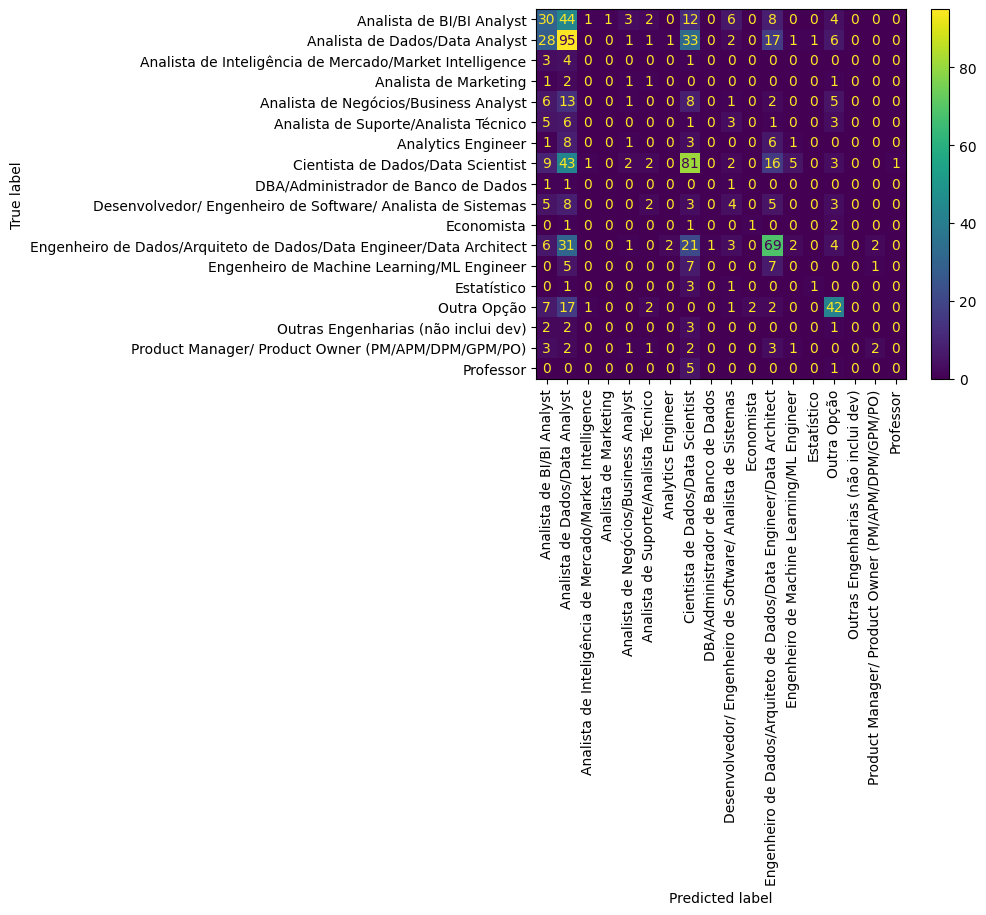

In [126]:
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=labels)
cm_display_lr.plot()
plt.xticks(rotation=90)

In [127]:
accuracy_score(y_test, y_pred_lr)

0.37906976744186044

#### 2.5.2. Decision Tree

In [128]:
y_pred_dt = clf_dt.predict(X_test)
y_pred_dt

array([ 0,  1, 15,  1,  3,  6, 11,  7,  5, 11,  1, 14, 14,  1,  7,  1, 14,
        1, 11,  1,  4,  7,  1, 11, 17, 14,  9,  1,  1, 16,  0, 14, 11, 11,
        7,  7,  7,  7,  1,  7,  0,  4,  0, 11,  1,  7,  0,  1,  9,  1,  0,
        1, 14,  0,  1, 11, 14,  1,  4, 11,  7,  0,  1,  0,  0,  0, 14,  7,
        0,  7,  1,  1,  0,  7,  3,  7,  1, 11,  1,  1,  1,  0,  1,  1, 14,
       11, 11,  1,  1, 16,  9,  7,  0, 14,  7, 11,  7,  1, 14,  1, 14,  1,
        7, 14,  4,  7,  1,  7,  7,  0,  7, 10, 11, 14, 14, 11,  1, 14,  1,
        7, 11,  7,  1,  0,  0,  0,  7,  0, 11,  1, 11,  1, 12,  1,  7,  2,
        7,  1,  5, 14, 12,  1,  7,  0,  1,  1,  1,  1,  7,  0,  7, 11,  0,
        1,  7,  1,  7,  7, 11,  7,  0,  7,  9, 11,  1, 11,  0, 11,  0,  7,
       11,  7,  7, 11,  0, 14,  6,  1,  7, 11,  0,  0,  7, 11, 12,  1,  1,
       14,  2,  0, 11,  7, 11,  7,  1,  7,  0,  1, 11,  1, 16,  1,  4, 14,
        0,  6,  1, 11,  1, 11,  7, 14,  1, 14, 11, 11,  7,  7,  7, 14,  5,
        0,  7,  7, 11, 11

In [129]:
cm_dt = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_dt,
)

cm_dt

array([[23, 26,  3,  0,  1,  3,  2, 16,  0,  7,  0, 15,  2,  1, 10,  2,
         0,  0],
       [36, 60,  3,  3,  6,  2,  3, 35,  0,  0,  0, 19,  0,  1, 15,  0,
         2,  1],
       [ 2,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
         0,  0],
       [ 5,  9,  2,  0,  1,  0,  1,  9,  0,  1,  0,  3,  0,  0,  4,  0,
         1,  0],
       [ 4,  3,  0,  0,  1,  3,  0,  2,  0,  0,  0,  1,  0,  0,  3,  2,
         0,  0],
       [ 1,  4,  0,  0,  1,  0,  1,  7,  0,  0,  0,  4,  1,  0,  1,  0,
         0,  0],
       [17, 42,  1,  0,  5,  1,  5, 58,  1,  1,  0, 17,  3,  1,  9,  0,
         4,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 5,  5,  0,  0,  1,  1,  0,  4,  0,  3,  1,  6,  0,  0,  4,  0,
         0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0],
       [12, 28,  0,  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Analista de BI/BI Analyst'),
  Text(1, 0, 'Analista de Dados/Data Analyst'),
  Text(2, 0, 'Analista de Inteligência de Mercado/Market Intelligence'),
  Text(3, 0, 'Analista de Marketing'),
  Text(4, 0, 'Analista de Negócios/Business Analyst'),
  Text(5, 0, 'Analista de Suporte/Analista Técnico'),
  Text(6, 0, 'Analytics Engineer'),
  Text(7, 0, 'Cientista de Dados/Data Scientist'),
  Text(8, 0, 'DBA/Administrador de Banco de Dados'),
  Text(9, 0, 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas'),
  Text(10, 0, 'Economista'),
  Text(11, 0, 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'),
  Text(12, 0, 'Engenheiro de Machine Learning/ML Engineer'),
  Text(13, 0, 'Estatístico'),
  Text(14, 0, 'Outra Opção'),
  Text(15, 0, 'Outras Engenharias (não inclui dev)'),
  Text(16, 0, 'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)'),
  Text(17, 0, 'Profess

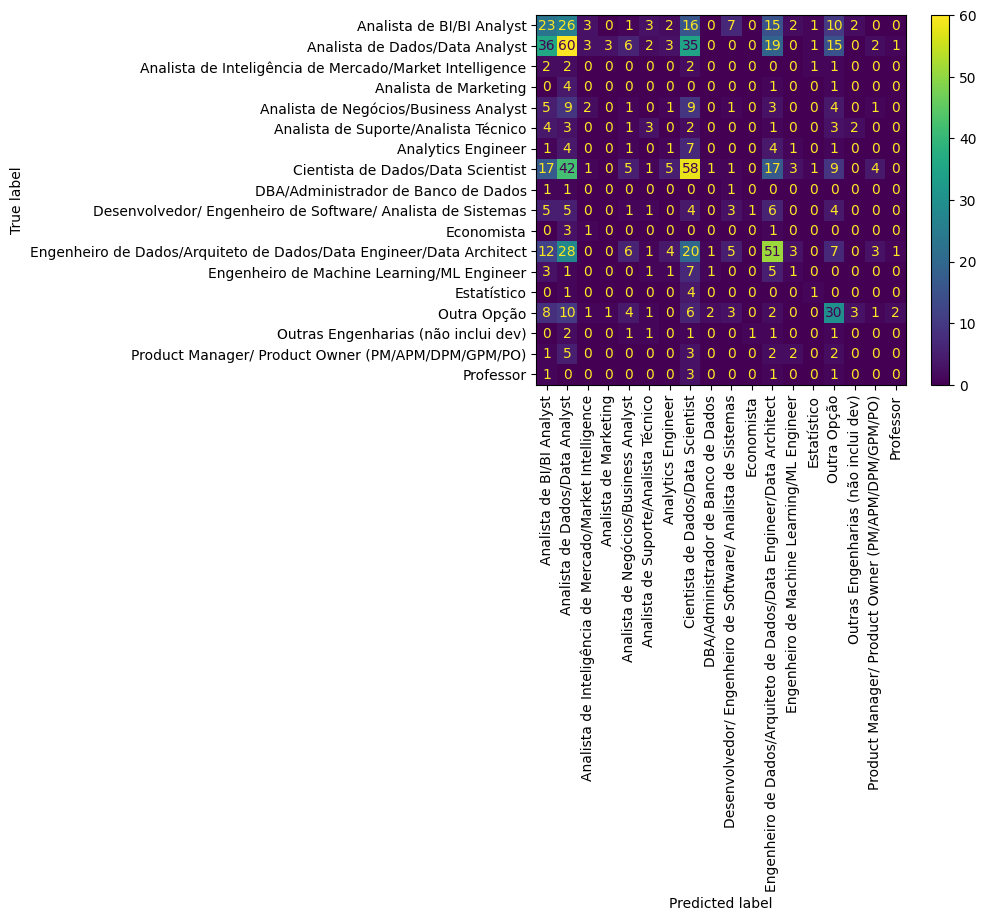

In [130]:
cm_display_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=labels)
cm_display_dt.plot()
plt.xticks(rotation=90)

In [131]:
accuracy_score(y_test, y_pred_dt)

0.26976744186046514

#### 2.5.3. Random Forest

In [132]:
y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([ 0, 11,  1,  1,  1,  1,  1,  7, 11,  1,  7,  1,  1,  1,  7,  1, 14,
        1,  4,  1,  4,  1,  0,  0,  7, 16,  0,  7,  1, 11,  0,  5, 11, 11,
        7,  1,  1,  7,  1,  1,  1, 11,  7, 11,  1,  7,  0,  1, 11,  0,  1,
        1,  1,  1,  1, 11, 14,  1,  1, 11,  7,  1,  1,  7,  1,  0, 17,  7,
        1,  7,  7,  1,  0,  7, 11,  1,  0, 11,  0,  1,  7,  1,  1,  1, 14,
        7, 11,  7,  7,  1,  9,  7, 11, 14,  7, 11,  1,  7,  0,  7, 14,  7,
        1,  0,  0, 11,  1,  0,  7,  1,  1, 14,  7, 14,  1, 11,  7,  0,  7,
        7, 11,  7,  7,  0,  1,  0,  7, 11,  1, 11, 11,  1, 11,  1,  0,  1,
        7,  1,  9, 14,  7,  0,  7,  0,  7,  7,  1,  1,  1,  0,  7, 11,  0,
       14,  5,  7,  7,  7, 11, 11,  7,  7, 11,  1,  7, 11,  7,  1, 11,  7,
       11,  1,  1, 11, 14,  1,  7,  0,  0, 11,  0,  0,  1,  1,  7,  1,  1,
       14, 14,  0,  7, 11, 11,  7,  1,  0,  0,  1, 11,  1,  1, 14,  4, 14,
        1,  7,  1,  1,  1, 11,  7, 14,  1,  7,  1,  1,  7,  1,  0,  7, 11,
        1,  7,  7, 11, 11

In [133]:
cm_rf = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_rf,
)

cm_rf

array([[32, 40,  0,  0,  0,  1,  0, 18,  0,  2,  0, 13,  0,  0,  5,  0,
         0,  0],
       [28, 90,  1,  0,  1,  1,  0, 36,  0,  1,  0, 20,  1,  0,  7,  0,
         0,  0],
       [ 1,  4,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
         0,  0],
       [ 4, 13,  0,  0,  1,  0,  0, 12,  0,  0,  0,  4,  0,  0,  2,  0,
         0,  0],
       [ 5,  6,  0,  0,  0,  0,  0,  1,  0,  2,  0,  1,  0,  0,  4,  0,
         0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  6,  0,  0,  0,  5,  0,  0,  1,  0,
         0,  0],
       [ 8, 39,  0,  0,  0,  1,  0, 91,  0,  1,  0, 19,  0,  0,  5,  0,
         1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 4, 10,  0,  0,  0,  1,  0,  1,  0,  4,  0,  7,  0,  0,  3,  0,
         0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 9, 31,  0,  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Analista de BI/BI Analyst'),
  Text(1, 0, 'Analista de Dados/Data Analyst'),
  Text(2, 0, 'Analista de Inteligência de Mercado/Market Intelligence'),
  Text(3, 0, 'Analista de Marketing'),
  Text(4, 0, 'Analista de Negócios/Business Analyst'),
  Text(5, 0, 'Analista de Suporte/Analista Técnico'),
  Text(6, 0, 'Analytics Engineer'),
  Text(7, 0, 'Cientista de Dados/Data Scientist'),
  Text(8, 0, 'DBA/Administrador de Banco de Dados'),
  Text(9, 0, 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas'),
  Text(10, 0, 'Economista'),
  Text(11, 0, 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'),
  Text(12, 0, 'Engenheiro de Machine Learning/ML Engineer'),
  Text(13, 0, 'Estatístico'),
  Text(14, 0, 'Outra Opção'),
  Text(15, 0, 'Outras Engenharias (não inclui dev)'),
  Text(16, 0, 'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)'),
  Text(17, 0, 'Profess

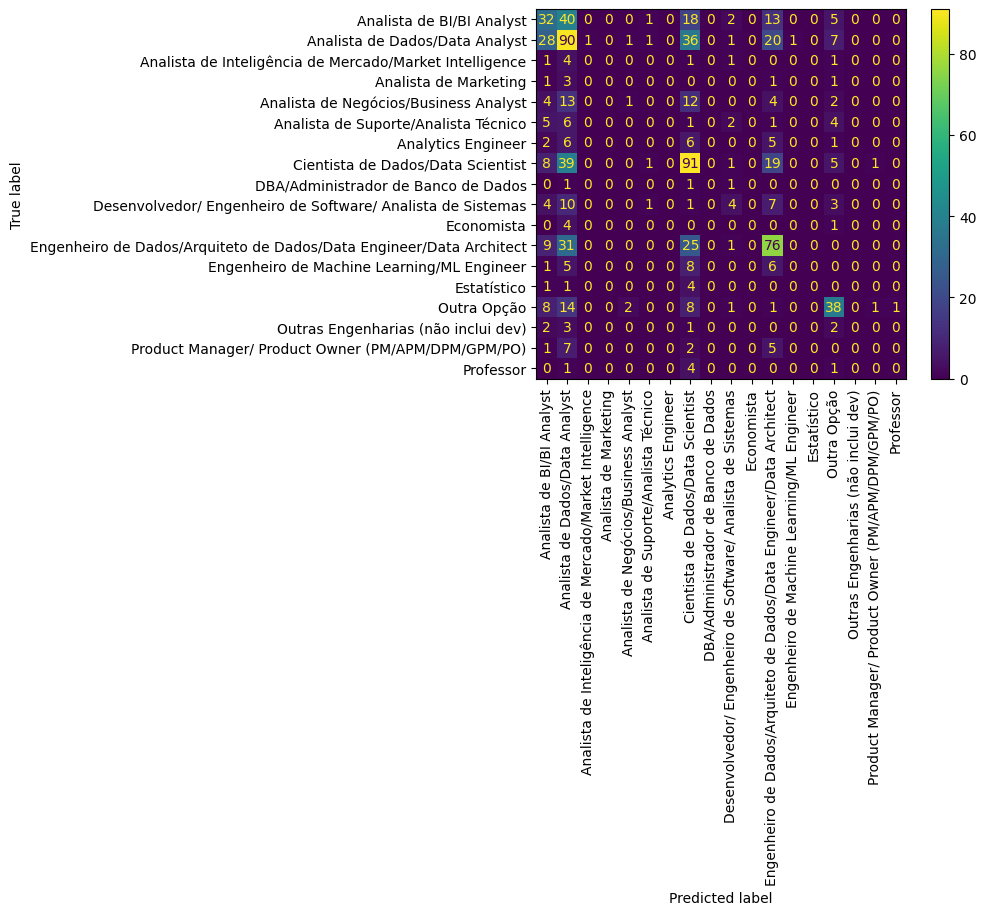

In [134]:
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=labels)
cm_display_rf.plot()
plt.xticks(rotation=90)

In [135]:
accuracy_score(y_test, y_pred_rf)

0.386046511627907

#### 2.5.4. SVM

In [136]:
y_pred_svm = clf_svm.predict(X_test)
y_pred_svm

array([ 1,  1,  1,  1,  1,  1, 11,  7,  1,  1,  7,  1,  1,  1,  7,  1, 14,
        1,  1,  1,  1,  1,  1,  1,  7,  1,  0,  7,  1,  1,  1,  1, 11, 11,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  0,  1, 11,  1,  1,
        1,  1,  1,  1, 11, 14,  1,  1, 11,  7,  1,  1,  7,  1,  1, 14, 11,
        1,  1,  1,  1,  1,  7,  1,  7,  1, 11,  1,  1,  1,  1,  1,  1,  1,
        7,  7,  1,  1,  1, 11,  7, 11, 14,  7,  1,  1,  1,  1,  1, 14,  1,
        1,  1,  1,  7,  1,  1,  7,  1,  1, 14,  7, 14,  1, 11, 11,  1,  1,
       11, 11,  1,  1,  1,  1,  1,  7,  1,  1,  7, 11,  7, 11,  1,  0,  1,
        7,  1,  1, 14,  7,  1,  1,  1,  7,  7,  1,  1,  7,  1,  7, 11,  1,
        1,  1,  7,  7,  1,  1, 11,  1,  1, 11,  1,  1,  1,  7,  1, 11,  7,
       11,  7,  1, 11,  1,  1,  7,  1,  1,  0,  1,  1,  1, 11,  7,  1,  1,
        1,  1,  1,  1,  1, 11,  7,  1,  1,  1,  1, 11,  1,  1,  1,  1, 14,
        1,  1,  1,  1,  1, 11,  7, 14,  1,  1,  1,  1,  7,  1,  1,  1,  1,
        7,  7,  7,  1, 11

In [137]:
cm_svm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_svm,
)

cm_svm

array([[  5,  95,   0,   0,   0,   0,   0,   5,   0,   0,   0,   6,   0,
          0,   0,   0,   0,   0],
       [  2, 153,   0,   0,   0,   0,   0,  22,   0,   0,   0,   9,   0,
          0,   0,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0],
       [  0,  25,   0,   0,   0,   0,   0,   6,   0,   0,   0,   4,   0,
          0,   1,   0,   0,   0],
       [  0,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   0,   0,   0],
       [  0,  11,   0,   0,   0,   0,   0,   3,   0,   0,   0,   6,   0,
          0,   0,   0,   0,   0],
       [  2,  82,   0,   0,   0,   0,   0,  65,   0,   0,   0,  16,   0,
          0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  3,  17,   0,   0,   0,   0,

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Analista de BI/BI Analyst'),
  Text(1, 0, 'Analista de Dados/Data Analyst'),
  Text(2, 0, 'Analista de Inteligência de Mercado/Market Intelligence'),
  Text(3, 0, 'Analista de Marketing'),
  Text(4, 0, 'Analista de Negócios/Business Analyst'),
  Text(5, 0, 'Analista de Suporte/Analista Técnico'),
  Text(6, 0, 'Analytics Engineer'),
  Text(7, 0, 'Cientista de Dados/Data Scientist'),
  Text(8, 0, 'DBA/Administrador de Banco de Dados'),
  Text(9, 0, 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas'),
  Text(10, 0, 'Economista'),
  Text(11, 0, 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'),
  Text(12, 0, 'Engenheiro de Machine Learning/ML Engineer'),
  Text(13, 0, 'Estatístico'),
  Text(14, 0, 'Outra Opção'),
  Text(15, 0, 'Outras Engenharias (não inclui dev)'),
  Text(16, 0, 'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)'),
  Text(17, 0, 'Profess

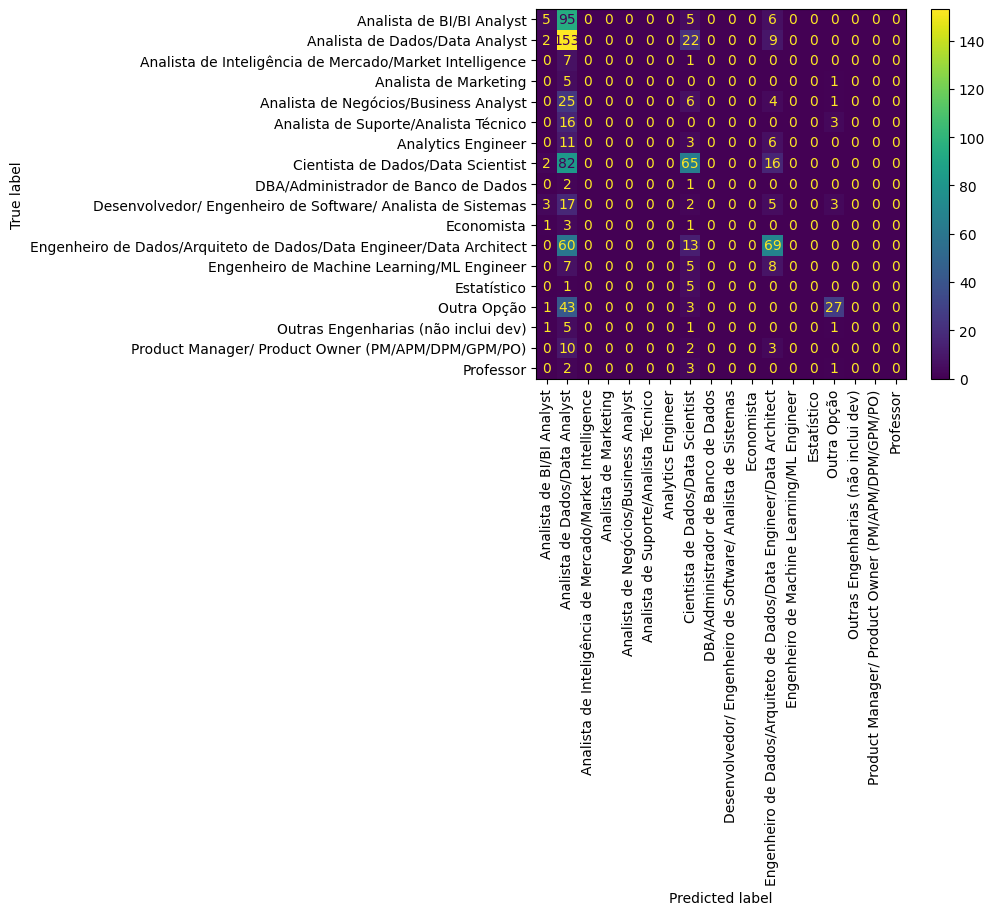

In [138]:
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=labels)
cm_display_svm.plot()
plt.xticks(rotation=90)

In [139]:
accuracy_score(y_test, y_pred_svm)

0.37093023255813956

#### 2.5.5. Multilayer Perceptron

In [140]:
y_pred_mlp = clf_mlp.predict(X_test)
y_pred_mlp

array([ 1,  0,  1,  1,  0, 11, 11,  7,  9,  1,  7,  1, 14,  7,  7,  7, 14,
        7, 11,  1,  0,  1,  1,  5, 13,  1,  0,  7,  9, 11,  1,  5, 11, 11,
        0,  7,  1,  1,  1,  1,  1, 11,  7, 11,  1,  2,  0,  1,  9,  1,  1,
        1,  9,  0,  7, 11, 14,  1,  1, 11, 11,  1,  1,  7,  1,  0, 14, 11,
        0,  1,  1,  1,  0,  7,  0,  7,  0, 11,  0,  1,  7,  1,  4,  1, 17,
        7,  7,  1,  1,  1,  9,  7, 11, 14,  7,  1,  1,  1,  1,  7, 14,  7,
        1,  0,  4,  7,  1,  0,  7,  1, 14, 14,  7, 14,  0, 11, 11,  1,  1,
        7, 11,  7,  7,  0,  1,  0,  7, 14, 11,  7, 11,  7, 11,  0,  9,  0,
        7,  1,  9, 14,  9,  5,  7,  7,  7, 11,  1,  1,  7,  1,  7, 11, 11,
       14,  1,  7, 11, 11,  1, 11,  1,  7, 11,  7, 14,  7,  9,  1, 11,  7,
       11,  7, 11, 11,  1,  7,  7, 14,  7, 11,  1,  0,  1, 11,  7,  1, 11,
       14,  1,  1, 11, 11,  1,  7,  7,  1,  0,  1, 11,  0, 14,  1,  0, 14,
        1,  1,  1,  1,  7,  7,  7, 14, 14, 14,  1, 11, 12,  9,  0,  1,  1,
        7,  7,  7,  7,  0

In [141]:
cm_mlp = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_mlp,
)

cm_mlp

array([[27, 36,  0,  0,  1,  2,  0, 17,  0,  7,  0, 15,  0,  0,  6,  0,
         0,  0],
       [27, 79,  2,  1,  1,  0,  0, 36,  0,  3,  0, 26,  1,  1,  9,  0,
         0,  0],
       [ 2,  5,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 6, 14,  0,  0,  0,  0,  0,  6,  0,  2,  0,  3,  1,  0,  4,  0,
         0,  0],
       [ 6,  4,  0,  0,  0,  0,  0,  2,  0,  4,  0,  1,  0,  0,  2,  0,
         0,  0],
       [ 0,  7,  0,  0,  1,  0,  0,  4,  0,  0,  0,  7,  1,  0,  0,  0,
         0,  0],
       [10, 30,  0,  0,  2,  2,  0, 86,  0,  2,  0, 18,  6,  1,  7,  0,
         0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 4,  9,  0,  0,  0,  2,  0,  2,  0,  4,  0,  6,  0,  0,  3,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  2,  0,
         0,  0],
       [ 8, 23,  0,  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Analista de BI/BI Analyst'),
  Text(1, 0, 'Analista de Dados/Data Analyst'),
  Text(2, 0, 'Analista de Inteligência de Mercado/Market Intelligence'),
  Text(3, 0, 'Analista de Marketing'),
  Text(4, 0, 'Analista de Negócios/Business Analyst'),
  Text(5, 0, 'Analista de Suporte/Analista Técnico'),
  Text(6, 0, 'Analytics Engineer'),
  Text(7, 0, 'Cientista de Dados/Data Scientist'),
  Text(8, 0, 'DBA/Administrador de Banco de Dados'),
  Text(9, 0, 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas'),
  Text(10, 0, 'Economista'),
  Text(11, 0, 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'),
  Text(12, 0, 'Engenheiro de Machine Learning/ML Engineer'),
  Text(13, 0, 'Estatístico'),
  Text(14, 0, 'Outra Opção'),
  Text(15, 0, 'Outras Engenharias (não inclui dev)'),
  Text(16, 0, 'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)'),
  Text(17, 0, 'Profess

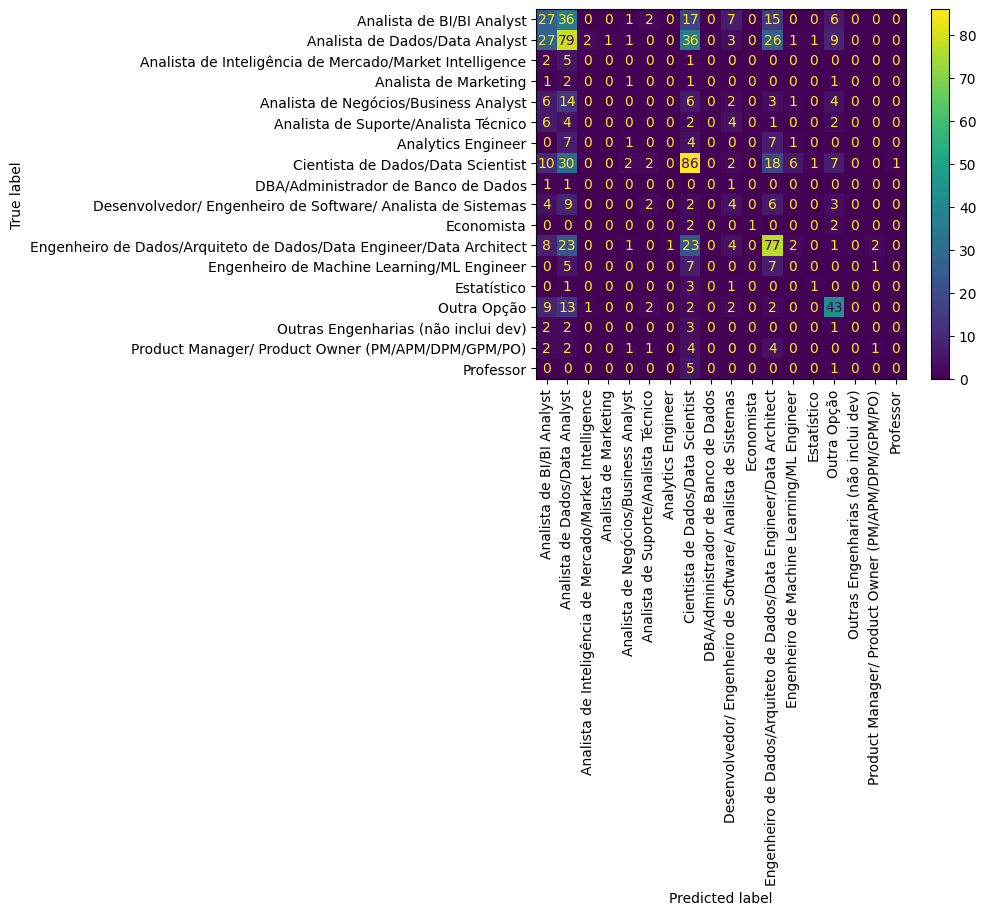

In [142]:
cm_display_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=labels)
cm_display_mlp.plot()
plt.xticks(rotation=90)

In [143]:
accuracy_score(y_test, y_pred_mlp)

0.37093023255813956